Analyze sales data from more than 16,500 games from Vgchartz and corresponding ratings from Metacritic.
* **Name** : Name of the game
* **Platform** : Console on which the game is running
* **Year_of_Release** : Year of the game released
* **Genre** : Game's category
* **Publisher** : Publisher
* **NA_Sales** : Game sales in North America (in millions of units)
* **EU_Sales** : Game sales in the European Union (in millions of units)
* **JP_Sales** : Game sales in Japan (in millions of units)
* **Other_Sales** : Game sales in the rest of the world
* **Global_Sales** : Total sales in the world (in millions of units)
* **Critic_Score** : Aggregate score compiled by Metacritic staff
* **Critic_Count** : The number of critics used in coming up with the Critic_score
* **User_Score** : Score by Metacritic's subscribers
* **User_Count** : Number of Metacritic's subscribers who gave the user_score
* **Developer** : Party responsible for creating the game
* **Rating** : The ESRB ratings

# Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
games = pd.read_csv("/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv")
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Ukuran DataFrame:", games.shape)

Ukuran DataFrame: (16719, 16)


# Data Cleaning

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## 1.) Dropping Unused Columns

In [ ]:
games.drop(['Publisher',
            'NA_Sales',
            'EU_Sales',
            'JP_Sales',
            'Other_Sales',
            'Critic_Count',
            'User_Score',
            'User_Count',
            'Developer',
            'Rating'], axis=1, inplace=True)
print("Ukuran DataFrame setelah drop kolom:", games.shape)

Ukuran DataFrame setelah drop kolom: (16719, 6)


## 2.) Checking Missing Values

In [ ]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Global_Sales          0
Critic_Score       8582
dtype: int64

In [ ]:
games[games.isnull().any(axis=1)].head(3)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score
1,Super Mario Bros.,NES,1985.0,Platform,40.24,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,31.37,NaN
5,Tetris,GB,1989.0,Puzzle,30.26,NaN


In [ ]:
games.dropna(inplace=True)
print("Ukuran DataFrame setelah cleaning:", games.shape)

Ukuran DataFrame setelah cleaning: (7983, 6)


## 3.) Checking Duplicated Values

In [ ]:
games.duplicated().sum()

0

In [ ]:
games.drop_duplicates(inplace=True)
print("Ukuran DataFrame setelah cleaning:", games.shape)

Ukuran DataFrame setelah cleaning: (7983, 6)


## 4.) Grouping by Platform

In [ ]:
print("Berbagai jenis platform:", games['Platform'].unique())

Berbagai jenis platform: ['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']


In [ ]:
games['Platform_General']= games['Platform']

In [ ]:
games.loc[games['Platform'] == 'Wii', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'X360', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PS3', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'PS2', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == '3DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'PS4', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'PS', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'XB', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PC', 'Platform_General'] = 'PC'
games.loc[games['Platform'] == 'PSP', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'WiiU', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GC', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GBA', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'XOne', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PSV', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'DC', 'Platform_General'] = 'Sega'

In [ ]:
games.head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Platform_General
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,28.92,58.0,Nintendo


In [ ]:
print("Berbagai jenis platform general:", games['Platform_General'].unique())

Berbagai jenis platform general: ['Nintendo' 'Microsoft_Xbox' 'Sony_Playstation' 'PC' 'Sega']


## 5.) Tidy Up Dataset

In [ ]:
# mengubah tipe data sebuah kolom
games['Year_of_Release'] = games['Year_of_Release'].astype(int).astype(object)
games['Critic_Score'] = games['Critic_Score'].astype(int)

In [ ]:
# mengganti nama value tertentu
duplicated_index = games[games.duplicated('Name', keep=False)].index.tolist()
games.loc[duplicated_index, "Platform"] = "Multi_Platform"
games.loc[duplicated_index, "Platform_General"] = "Multi_Platform"
games.loc[games['Genre'] == 'Role-Playing', 'Genre'] = 'Role_Playing'

In [ ]:
# menggabungkan nama game yang sama
games['Global_Sales'] = games.groupby(['Name'])['Global_Sales'].transform('sum')
games = games.drop_duplicates(subset=['Name'])

In [ ]:
# mengubah urutan kolom
games = games.reindex(columns=['Name','Platform','Platform_General','Year_of_Release','Genre','Global_Sales','Critic_Score'])
games = games.reset_index(drop=True)

In [ ]:
games.sample(5)

,Name,Platform,Platform_General,Year_of_Release,Genre,Global_Sales,Critic_Score
2075,Rumble Roses,PS2,Sony_Playstation,2004,Fighting,0.39,66
4074,Cosmic Family,Wii,Nintendo,2007,Misc,0.08,54
1048,Medal of Honor: Underground,Multi_Platform,Multi_Platform,2000,Shooter,1.05,86
2776,NBA Street: Showdown,PSP,Sony_Playstation,2005,Sports,0.22,75
2359,Jonah Lomu Rugby Challenge,X360,Microsoft_Xbox,2011,Sports,0.31,73


# Exploring Data

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5031 entries, 0 to 5030
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              5031 non-null   object 
 1   Platform          5031 non-null   object 
 2   Platform_General  5031 non-null   object 
 3   Year_of_Release   5031 non-null   object 
 4   Genre             5031 non-null   object 
 5   Global_Sales      5031 non-null   float64
 6   Critic_Score      5031 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 275.3+ KB


In [ ]:
games.nunique()

Name                5031
Platform              18
Platform_General       6
Year_of_Release       24
Genre                 12
Global_Sales         752
Critic_Score          79
dtype: int64

In [ ]:
games.describe()

,Global_Sales,Critic_Score
count,5031.000000,5031.000000
mean,1.100358,68.579209
std,2.726911,14.299440
min,0.010000,19.000000
25%,0.110000,60.000000
50%,0.320000,70.000000
75%,1.060000,79.000000
max,82.530000,98.000000


## 1.) Univariate Analysis

                jumlah sampel  persentase
Multi_Platform           1665       33.09
PS2                       587       11.67
DS                        487        9.68
PC                        308        6.12
GBA                       300        5.96
Wii                       285        5.66
PSP                       257        5.11
XB                        204        4.05
X360                      181        3.60
PS                        163        3.24
PS3                       149        2.96
3DS                       121        2.41
GC                        116        2.31
PS4                        72        1.43
PSV                        60        1.19
WiiU                       43        0.85
XOne                       21        0.42
DC                         12        0.24


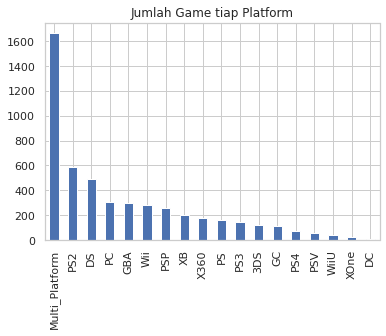

In [ ]:
count = games['Platform'].value_counts()
percent = 100*games['Platform'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(2)})
print(df)
count.plot(kind='bar', title="Jumlah Game tiap Platform");

                  Jumlah  Persentase
Multi_Platform      1665       33.09
Nintendo            1352       26.87
Sony_Playstation    1288       25.60
Microsoft_Xbox       406        8.07
PC                   308        6.12
Sega                  12        0.24


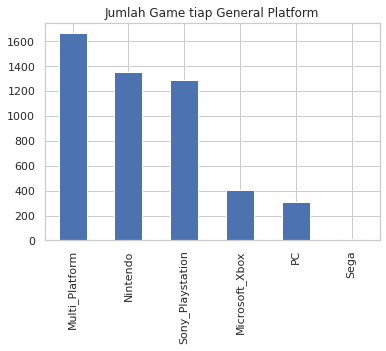

In [ ]:
count = games['Platform_General'].value_counts()
percent = 100*games['Platform_General'].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah':count, 'Persentase':percent.round(2)})
print(df)
count.plot(kind='bar', title="Jumlah Game tiap General Platform");

      jumlah sampel  persentase
1985              1        0.02
1988              1        0.02
1994              1        0.02
1996              7        0.14
1997             17        0.34
1998             27        0.54
1999             39        0.78
2000            131        2.60
2001            274        5.45
2002            428        8.51
2003            363        7.22
2004            360        7.16
2005            410        8.15
2006            397        7.89
2007            421        8.37
2008            456        9.06
2009            393        7.81
2010            295        5.86
2011            285        5.66
2012            179        3.56
2013            144        2.86
2014            140        2.78
2015            135        2.68
2016            127        2.52


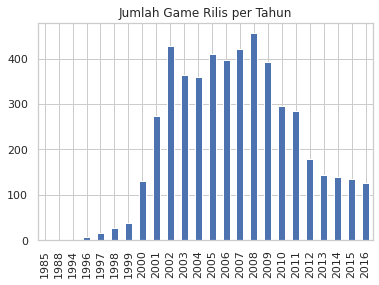

In [ ]:
count = games['Year_of_Release'].value_counts().sort_index()
percent = 100*games['Year_of_Release'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(2)})
print(df)
count.plot(kind='bar', title="Jumlah Game Rilis per Tahun");

              jumlah sampel  persentase
Action                  972       19.32
Sports                  607       12.07
Role_Playing            602       11.97
Shooter                 540       10.73
Racing                  426        8.47
Misc                    353        7.02
Platform                310        6.16
Simulation              275        5.47
Fighting                269        5.35
Adventure               246        4.89
Strategy                242        4.81
Puzzle                  189        3.76


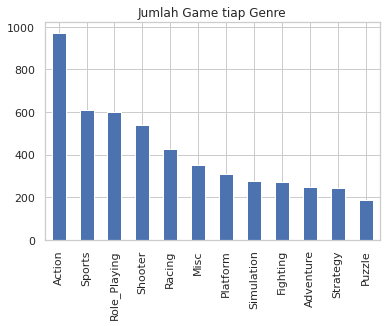

In [ ]:
count = games['Genre'].value_counts()
percent = 100*games['Genre'].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(2)})
print(df)
count.plot(kind='bar', title="Jumlah Game tiap Genre");

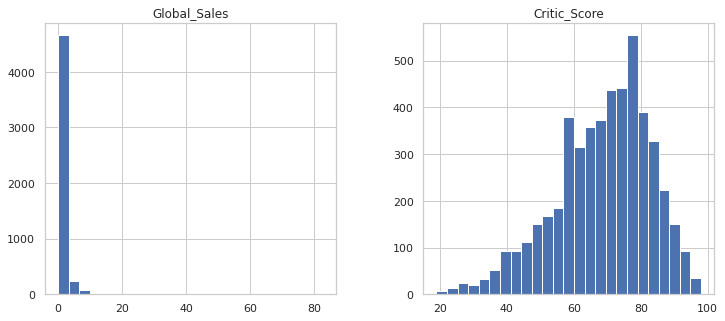

In [ ]:
games.hist(bins=25, figsize=(12,5))
plt.show()

## 2.) Multivariate Analysis

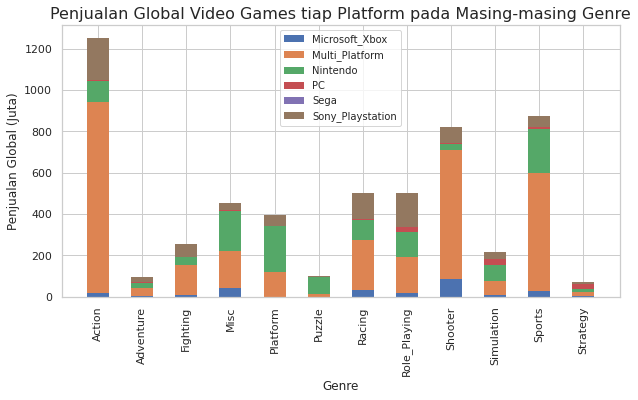

In [ ]:
df = games.groupby(['Genre','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(10,5))
plt.title('Penjualan Global Video Games tiap Platform pada Masing-masing Genre', size=16)
plt.ylabel('Penjualan Global (Juta)')
plt.xlabel('Genre')
plt.legend(loc=9, prop={'size': 10})
plt.autoscale()
plt.show()

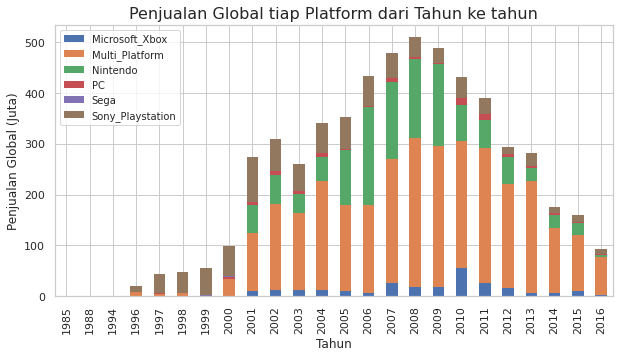

In [ ]:
df = games.groupby(['Year_of_Release','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(10,5))
plt.title('Penjualan Global tiap Platform dari Tahun ke tahun', size=16)
plt.ylabel('Penjualan Global (Juta)')
plt.xlabel('Tahun')
plt.legend(loc=2, prop={'size': 10})
plt.show()

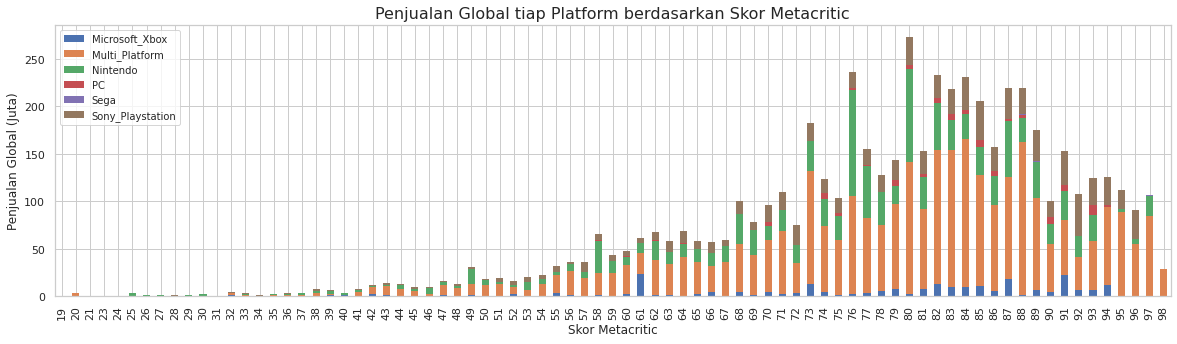

In [ ]:
df = games.groupby(['Critic_Score','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(20,5))
plt.title('Penjualan Global tiap Platform berdasarkan Skor Metacritic', size=16)
plt.ylabel('Penjualan Global (Juta)')
plt.xlabel('Skor Metacritic')
plt.legend(loc=2, prop={'size': 10})
plt.show()

# Development

In [ ]:
dataset = games.copy()
dataset.sample(10)

,Name,Platform,Platform_General,Year_of_Release,Genre,Global_Sales,Critic_Score
287,Middle-Earth: Shadow of Mordor,Multi_Platform,Multi_Platform,2014,Action,4.66,84
298,Sega Superstars Tennis,Multi_Platform,Multi_Platform,2008,Sports,5.46,67
2697,Resident Evil Archives: Resident Evil Zero,Wii,Nintendo,2008,Action,0.24,62
10,Grand Theft Auto V,Multi_Platform,Multi_Platform,2013,Action,56.57,97
2936,Teenage Mutant Ninja Turtles 3: Mutant Nightmare,Multi_Platform,Multi_Platform,2005,Action,0.42,53
4252,MX vs. ATV Supercross,Multi_Platform,Multi_Platform,2014,Racing,0.09,48
4417,Hummer Badlands,Multi_Platform,Multi_Platform,2006,Racing,0.07,48
2983,Aliens versus Predator: Extinction,Multi_Platform,Multi_Platform,2003,Strategy,0.27,66
4823,Samurai Shodown V,XB,Microsoft_Xbox,2006,Fighting,0.02,58
944,NASCAR Thunder 2004,Multi_Platform,Multi_Platform,2003,Racing,1.31,88


## 1.) TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tf = TfidfVectorizer()
tf.fit(dataset['Genre']) 
tf.get_feature_names() 

['action',
 'adventure',
 'fighting',
 'misc',
 'platform',
 'puzzle',
 'racing',
 'role_playing',
 'shooter',
 'simulation',
 'sports',
 'strategy']

In [ ]:
tfidf_matrix = tf.fit_transform(dataset['Genre']) 
tfidf_matrix.shape 

(5031, 12)

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=dataset['Name']
).sample(12, axis=1).sample(10, axis=0)

,adventure,shooter,misc,puzzle,strategy,simulation,racing,action,fighting,platform,role_playing,sports
Name,,,,,,,,,,,,
Angry Birds Star Wars,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MVP 06 NCAA Baseball,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
True Swing Golf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Top Gun,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
We Ski,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Mike Tyson Heavyweight Boxing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
WWE Wrestlemania X8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Altered Beast: Guardian of the Realms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Metroid Fusion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 2.) Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama game
cosine_sim_df = pd.DataFrame(cosine_sim, index=dataset['Name'], columns=dataset['Name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap genre
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5031, 5031)


Name,South Park: The Stick of Truth,Disney's The Emperor's New Groove,Dead Island: Riptide,Front Mission 4,Island Xtreme Stunts
Name,,,,,
Pokemon Art Academy,0.0,0.0,0.0,0.0,0.0
Code Lyoko: Quest for Infinity,0.0,0.0,1.0,0.0,1.0
SplashDown,0.0,0.0,0.0,0.0,0.0
Jewel Quest: Expeditions,0.0,0.0,0.0,0.0,0.0
Bullet Witch,0.0,0.0,0.0,0.0,0.0
NASCAR The Game: Inside Line,0.0,0.0,0.0,0.0,0.0
Hitman: Contracts,0.0,0.0,0.0,0.0,0.0
Ar Nosurge: Ode to an Unborn Star,1.0,0.0,0.0,0.0,0.0
Dishonored 2,0.0,0.0,1.0,0.0,1.0


## 3.) Getting Recommendation

In [ ]:
def recommender_system(Name, k=500):
    similarity_data = cosine_sim_df
    items = dataset[['Name','Platform','Year_of_Release','Genre','Global_Sales','Critic_Score']]
    genre = dataset.loc[dataset["Name"] == Name].Genre.values

    index = similarity_data.loc[:,Name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(Name, errors='ignore')
    
    goat = dataset.sort_values(by=['Critic_Score'],ascending=False).head(3)
    best_selling_genre = dataset.loc[dataset["Genre"] == genre[0]].sort_values(by=['Global_Sales'],ascending=False).head(5)
    recommendation = pd.DataFrame(closest).merge(items[['Name','Platform','Year_of_Release','Genre']]).head(k)
    
    return Name, goat, best_selling_genre, recommendation, genre

In [ ]:
dataset[dataset['Name'].eq('Crash Team Racing')]

,Name,Platform,Platform_General,Year_of_Release,Genre,Global_Sales,Critic_Score
133,Crash Team Racing,PS,Sony_Playstation,1999,Racing,4.79,88


In [ ]:
Name, goat, best_selling_genre, recommendation, genre = recommender_system("Crash Team Racing")

In [ ]:
print("Top 3 Greatest Games of All Time:")
print("-----"*10)
for row1 in goat.itertuples():
    print('[Score: %d/100] %s (%s)'%(row1.Critic_Score,row1.Name,row1.Year_of_Release))

print("====="*10)  
print("Top 5 Best Selling %s Games of All Time:"%genre[0])
print("-----"*10)
for row2 in best_selling_genre.itertuples():
    print('%s (%s) - %s'%(row2.Name,row2.Year_of_Release,row2.Platform))

print("====="*10)
print("Since you play %s,"%Name)
print("here are the Top 10 Games you probably like:")
print("-----"*10)
for row3 in recommendation.head(10).itertuples():
    print('%s (%s) - %s'%(row3.Name,row3.Year_of_Release,row3.Platform))

Top 3 Greatest Games of All Time:
--------------------------------------------------
[Score: 98/100] Grand Theft Auto IV (2008)
[Score: 98/100] Tony Hawk's Pro Skater 2 (2000)
[Score: 98/100] SoulCalibur (1999)
Top 5 Best Selling Racing Games of All Time:
--------------------------------------------------
Mario Kart Wii (2008) - Wii
Mario Kart DS (2005) - DS
Gran Turismo 3: A-Spec (2001) - PS2
Mario Kart 7 (2011) - 3DS
Gran Turismo 4 (2004) - PS2
Since you play Crash Team Racing,
here are the Top 10 Games you probably like:
--------------------------------------------------
L.A. Rush (2005) - Multi_Platform
GT Advance 2: Rally Racing (2001) - GBA
F1 2002 (2002) - Multi_Platform
Burnout (2001) - Multi_Platform
Blood Drive (2010) - Multi_Platform
Cruis'n (2007) - Wii
nail'd (2010) - Multi_Platform
Pokemon Dash (2004) - DS
Blur (2010) - Multi_Platform
Pimp My Ride (2008) - Multi_Platform


# Evaluate

In [ ]:
recommendation["Genre"].value_counts()

Racing          425
Action           16
Sports           16
Role_Playing     12
Shooter           8
Misc              8
Fighting          6
Platform          3
Simulation        2
Adventure         2
Puzzle            1
Strategy          1
Name: Genre, dtype: int64

In [ ]:
relevan = tidak_relevan = 0

for checking in recommendation.itertuples():
    if checking.Genre == genre[0]:
        relevan+=1
    else:
        tidak_relevan+=1
        
print("Out of a total of 500 recommendation lists,")
print("- Number of relevant recommendations:",relevan)
print("- Number of irrelevant recommendations:",tidak_relevan)
print("Precision Score =",(relevan/500))

Out of a total of 500 recommendation lists,
- Number of relevant recommendations: 425
- Number of irrelevant recommendations: 75
Precision Score = 0.85
